<a href="https://colab.research.google.com/github/Kulvinder26/Machine-learning/blob/master/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Implementation of K-means Clustering Algorithm`**


In the clustering problem, we are given a training set {x(1), . . . , x(m)}, and want to group the data into a few cohesive “clusters.”  Here, x(i) ∈ R<sub>n </sub> as usual; but no labels y(i) are given. 
So, this is an unsupervised learning problem.
# Algorithm

The k-means clustering algorithm is as follows:




## 1. Initialize cluster centroids μ<sub>1 </sub>, μ<sub>2 </sub>, . . . , μ<sub>k </sub> ∈ R<sub>n </sub>  randomly.

## 2. Repeat until convergence:

##                               {
##                                      For every i , set 
##                                                                      c(i) : = arg min j ||x(i)−μ<sub>j </sub> ||<sup>2 </sup> .
                                      
##                                      For each j, set
##                                                                        μ<sub>j </sub> := ∑<sup>m</sup> <sub>i=1</sub> 1{c<sup>(i)</sup>=j}x<sup>(i)</sup> / ∑<sup>m</sup> <sub>i=1</sub>1{c<sup>(i)</sup> =j}.
                                          
                                   
###                                   }


In [0]:
import numpy as np                                          # for linear algebra and vectorized operations

from sklearn.datasets.samples_generator import make_blobs   # to create an artificial dataset as per requirement

import matplotlib.pyplot as plt                             # plotting the data for visual understanding 

from copy import deepcopy                                   # Utility functions


In [0]:
def give_label(X,centroid,n_centroid):     #For finding the label for the given point based on the distance to nearest centroid
    label = [None]*X.shape[0]
    for i in range(X.shape[0]):
        k = [None]*centroid.shape[0]
        for j in range(centroid.shape[0]):
            c = dist(X[i],centroid[j],None)
            k[j] = c
        e = list(np.where(k == np.amin(k)))
        label[i] = e[0]
        
    label = [e for e, in label]

    X0 = X[:,0]
    X1 = X[:,1]
    color = []
    
    for l in label:
        if l == 0:
            color.append('green')
        elif l == 1:
            color.append('blue')
        elif l == 2:
            color.append('red')
        elif l == 3:
            color.append('orange')
        else:
            color.append('black')
    k = ['*','P','X','v','D']
    for j in range(n_centroid):
        plt.plot(centroid[j][0],centroid[j][1],k[j],linewidth=20, markersize=20)
    plt.scatter(X0,X1,linewidths=4 ,color = color)
    plt.ylabel('X[1]')
    plt.xlabel('X[0]')
    plt.show()
    return label


In [0]:
def move_label(X,centroid,c):               # For taking the mean of all the values at every single centroid to compute new centroid
    for i in range(centroid.shape[0]):
        values = np.array(c)
        searchval = i
        ii = np.where(values == searchval)[0]
        k = np.array(X[ii])
        no_val = len(ii)
        Total_sum0 = np.sum(k[:,0])
        Total_sum1 = np.sum(k[:,1])
        Total_sum = np.array([Total_sum0,Total_sum1])
        avg = Total_sum/no_val
        centroid[i] = avg
    return centroid


In [0]:
def dist(a, b, ax=1):                     # For computing L-2 distance between two points
    return np.linalg.norm(a - b, axis=ax)

Initial Centroid : 
For Class  0  :  [ 1.11592663 -0.85820597]
For Class  1  :  [0.66203417 1.84614342]
For Class  2  :  [-0.03098664  1.31789946]


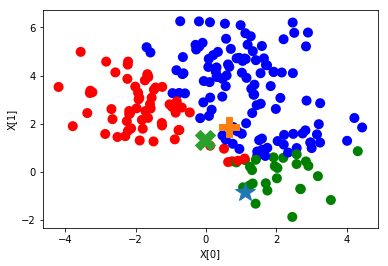

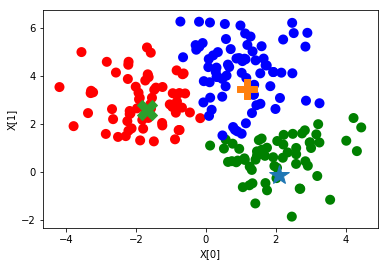

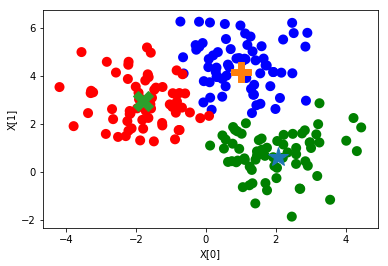

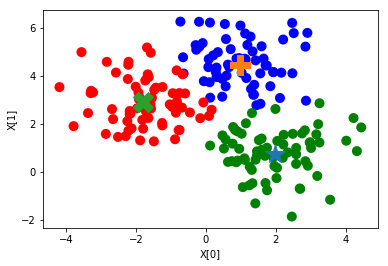

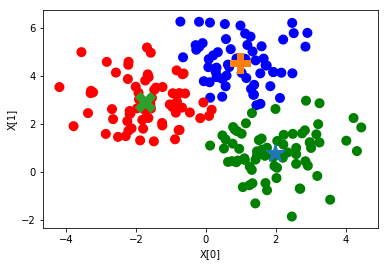

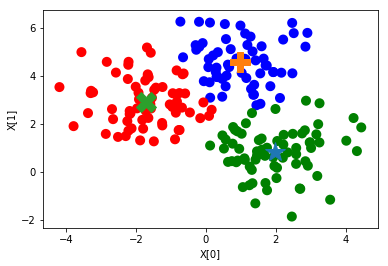

Final Optimal Centroid : 
For Class  0  :  [1.98410174 0.81302038]
For Class  1  :  [0.97692125 4.56883102]
For Class  2  :  [-1.71656153  2.91261167]


In [9]:
n_centroid = 3    # the given implementation works for cases where number of centroid is in range [1,5]
                  # Just change the case you want to see like n_centroid = 2 or 3 or 4 etc.

X, _ = make_blobs(n_samples=200, centers=n_centroid, n_features=2,random_state=0)  # Creates data points for any classification based algorithm
#print(X.shape)
centroid = np.random.uniform(-1,2,(n_centroid,X.shape[1]))    # Randomly initialising the centroids

#print(X)
print("Initial Centroid : ")         # Displaying Initial centroids
for i in range(n_centroid):
  print("For Class ",i," : ",centroid[i])


centro = [5] * len(centroid)
C_old = np.zeros(centroid.shape)
error = dist(centroid, C_old, None)


while(error != 0):                   # Runs both functions till centroids converges

    c = give_label(X,centroid,n_centroid)
    C_old = deepcopy(centroid)
    centroid = move_label(X,centroid,c)
    error = dist(centroid, C_old, None)
   
 
print("Final Optimal Centroid : ")    # Displaying Final centroids
for i in range(n_centroid):
  print("For Class ",i," : ",centroid[i])
